In [256]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
import matplotlib.pyplot as plt
rest_df = pd.read_csv("restaurant_data.csv")
rest_df.head()


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [257]:

rest_df.loc[rest_df['Parking Availability']=='Yes', 'Parking Availability'] = 1
rest_df.loc[rest_df['Parking Availability']=='No', 'Parking Availability'] = 0
def encode_location(location):
    return {
        'Rural': 1 if location == 'Rural' else 0,
        'Downtown': 1 if location == 'Downtown' else 0
    }

Cuisine_dummies = pd.get_dummies(rest_df['Cuisine'], dtype=int)

encoded_locations = rest_df['Location'].apply(lambda x: pd.Series(encode_location(x)))
rest_df = pd.concat([rest_df, encoded_locations, Cuisine_dummies], axis=1)
rest_df = rest_df.drop(['Location','Cuisine'], axis=1)

x = rest_df.drop(['Name','Revenue'], axis=1)
y = rest_df[['Revenue']]

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size= 0.3 , random_state= 44)

In [258]:
max_depth = 6
clf = DecisionTreeRegressor(max_depth=max_depth, random_state=1)

clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [259]:

num_folds = 10

fold_size = len(x) // num_folds


r2_scores = []
for i in range(num_folds):
    start_idx = min(i * fold_size, len(x))
    end_idx = min((i + 1) * fold_size, len(x))
    
    x_train_fold = pd.concat([x.iloc[:start_idx], x.iloc[end_idx:]])
    y_train_fold = pd.concat([y.iloc[:start_idx], y.iloc[end_idx:]])
    x_test_fold = x.iloc[start_idx:end_idx]
    y_test_fold = y.iloc[start_idx:end_idx]
    
    clf.fit(x_train_fold, y_train_fold)
    y_pred_fold = clf.predict(x_test_fold)
    
    r2_fold = r2_score(y_test_fold, y_pred_fold)
    r2_scores.append(r2_fold)

# Calculate and print average R-squared score across folds
avg_r2_score = sum(r2_scores) / num_folds
print("Average R-squared score:", avg_r2_score)


Average R-squared score: 0.9817922492259381


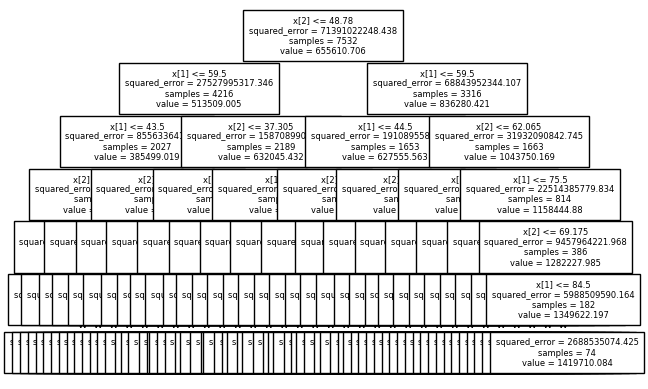

In [260]:
tree.plot_tree(clf, fontsize=6)
plt.show()